# Quake

By Cascade Tuholske, June 2020

Notebook finds zonal stats of populations for 2015 Nepal Earthquake by raster. <br><br>
**NOTE** CRS should be epsg:4326 for everything!

In [18]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
import matplotlib.pyplot as plt

In [15]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split('_matched.tif')[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [3]:
#### File Paths & FNs
DATA_PATH = '../data/'

In [9]:
#### Run on Quake Intensity Contours from USGS
polys_fn = DATA_PATH+'raw/USGS_Data/shape/mi.shp'
polys = gpd.read_file(polys_fn)

In [12]:
polys.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,14,14,0,2.8,"(POLYGON ((90.084232 31.916667, 90.083868 31.9..."
1,0.0,0.0,15,15,0,3.0,"(POLYGON ((81.46714799999999 31.9, 81.466964 3..."
2,0.0,0.0,16,16,0,3.2,"(POLYGON ((81.97314900000001 31.916667, 81.971..."
3,0.0,0.0,17,17,0,3.4,"(POLYGON ((82.986627 31.916667, 82.98523 31.91..."
4,0.0,0.0,18,18,0,3.6,"(POLYGON ((84.816005 31.933333, 84.80491499999..."


In [13]:
# subset, be sure to check the admin level
col = 'PARAMVALUE'
polys = polys[['geometry', col]]

In [14]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/GHS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_matched.tif']

In [44]:
# Run zonal stats loop
polys_sum = zone_loop(polys, rst_fns, 'sum')


Started GHS15
Started LS15
Started ESRI16
Started WP16


,geometry,PARAMVALUE,GHS15_sum,LS15_sum,ESRI16_sum,WP16_sum
0,"(POLYGON ((90.084232 31.916667, 90.083868 31.9...",2.8,1.113040e+03,17095.0,28001.0,3.708699e+04
1,"(POLYGON ((81.46714799999999 31.9, 81.466964 3...",3.0,1.555337e+05,347249.0,513252.0,4.292558e+05
2,"(POLYGON ((81.97314900000001 31.916667, 81.971...",3.2,8.927926e+06,9335964.0,9375369.0,8.987672e+06
3,"(POLYGON ((82.986627 31.916667, 82.98523 31.91...",3.4,1.498486e+07,14525048.0,17542796.0,1.402728e+07
4,"(POLYGON ((84.816005 31.933333, 84.80491499999...",3.6,1.625621e+07,16518180.0,19499055.0,1.672695e+07
5,"(POLYGON ((85.142526 31.75, 85.140923 31.74241...",3.8,3.349102e+07,32597634.0,38292866.0,3.336645e+07
6,"(POLYGON ((84.662587 31.4, 84.656797 31.393203...",4.0,4.376659e+07,41755245.0,50398861.0,4.534833e+07
7,"(POLYGON ((85.135907 31.016667, 85.135221 31.0...",4.2,5.250664e+07,47903984.0,56377438.0,5.046868e+07
8,"(POLYGON ((84.802924 30.566667, 84.80247799999...",4.4,4.724072e+07,44122439.0,52779253.0,4.739709e+07
9,"(POLYGON ((84.684113 30.283333, 84.68384399999...",4.6,2.410041e+07,23105529.0,28896790.0,2.529921e+07


In [61]:
#### Save the poly sums
polys_sum.to_file(DATA_PATH+'/interim/quake_pop.shp')

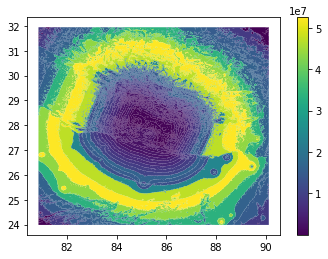

In [48]:
fig, ax = plt.subplots(1, 1)

polys_sum[polys_sum['PARAMVALUE'] < 8.8].plot(column='GHS15_sum', ax=ax, legend=True);

In [52]:
x_data = polys_sum[polys_sum['PARAMVALUE'] > 5]['PARAMVALUE']

x_data

12    5.2
13    5.4
14    5.6
15    5.8
16    6.0
17    6.2
18    6.4
19    6.6
20    6.8
21    7.0
22    7.2
23    7.4
24    7.6
25    7.8
26    8.0
27    8.2
28    8.4
29    8.6
30    8.8
Name: PARAMVALUE, dtype: float64

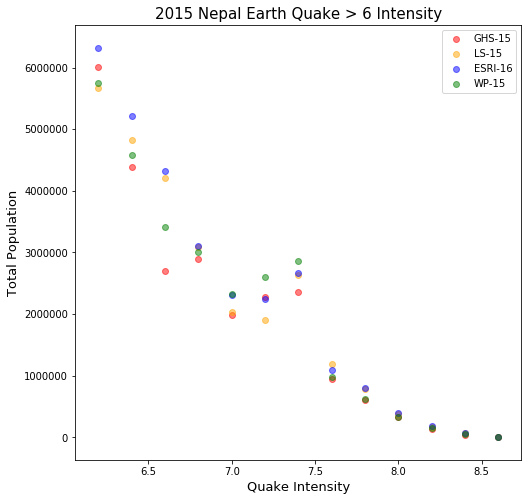

In [65]:
#### plot it
fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

data = polys_sum[polys_sum['PARAMVALUE'] > 6]

axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title('2015 Nepal Earth Quake > 6 Intensity', size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)


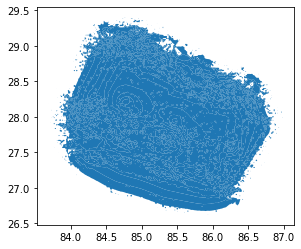

In [60]:
fig, ax = plt.subplots(1, 1)

polys_sum[polys_sum['PARAMVALUE'] > 6.5].plot(ax = ax);